AT and GC skew analysis of Wigglesworth Glossinidia

Resources:
* Genome data source: https://www.ncbi.nlm.nih.gov/nuccore/NC_004344.2
* GC and AT skew info: https://en.wikipedia.org/wiki/GC_skew
* DNA Replication and Strand Asymmetry in Prokaryotic and Mitochondrial Genomes: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3269012/

Notes:
* The A/T counts for WG are each almost 3.5x that of the G/C counts

In [56]:
counts = {'A': 0, 'G': 0, 'C': 0, 'T': 0}
gc_skew = []
at_skew = []
length = 0
gc_minim = float('inf')
at_minim = float('inf')
gc_minim_idx = 0
at_minim_idx = 0
idx = 0

with open('sequence.fasta') as fd:
    for line in fd.readlines():
        line = line.strip()
        if not line or line[0] == '>':
            continue
        for char in line:
            if char in counts:
                length += 1
                counts[char] += 1
                if counts['G'] + counts['C'] == 0:
                    gc_skew.append(0)
                else:
                    gc_skew.append((counts['G'] - counts['C']) / (counts['G'] + counts['C']))
                if counts['A'] + counts['T'] == 0:
                    at_skew.append(0)
                else:
                    at_skew.append((counts['A'] - counts['T']) / (counts['A'] + counts['T']))
                if at_skew[idx] < at_minim:
                    at_minim = at_skew[idx]
                    at_minim_idx = idx
                if gc_skew[idx] < gc_minim:
                    gc_minim = gc_skew[idx]
                    gc_minim_idx = idx
                idx += 1

print('Total length of the sequence is', length)
print('Nucleotide counts:', counts)
print('Overall A to T difference is', counts['A'] - counts['T'])
print('Overall G to C difference is ', counts['C'] - counts['G'])
print('GC skew minimum is at index', gc_minim_idx)
print('AT skew minimum is at index', at_minim_idx)

Total length of the sequence is 697724
Nucleotide counts: {'A': 270801, 'G': 78228, 'C': 78613, 'T': 270082}
Overall A to T difference is 719
Overall G to C difference is  385
GC skew minimum is at index 166
AT skew minimum is at index 29


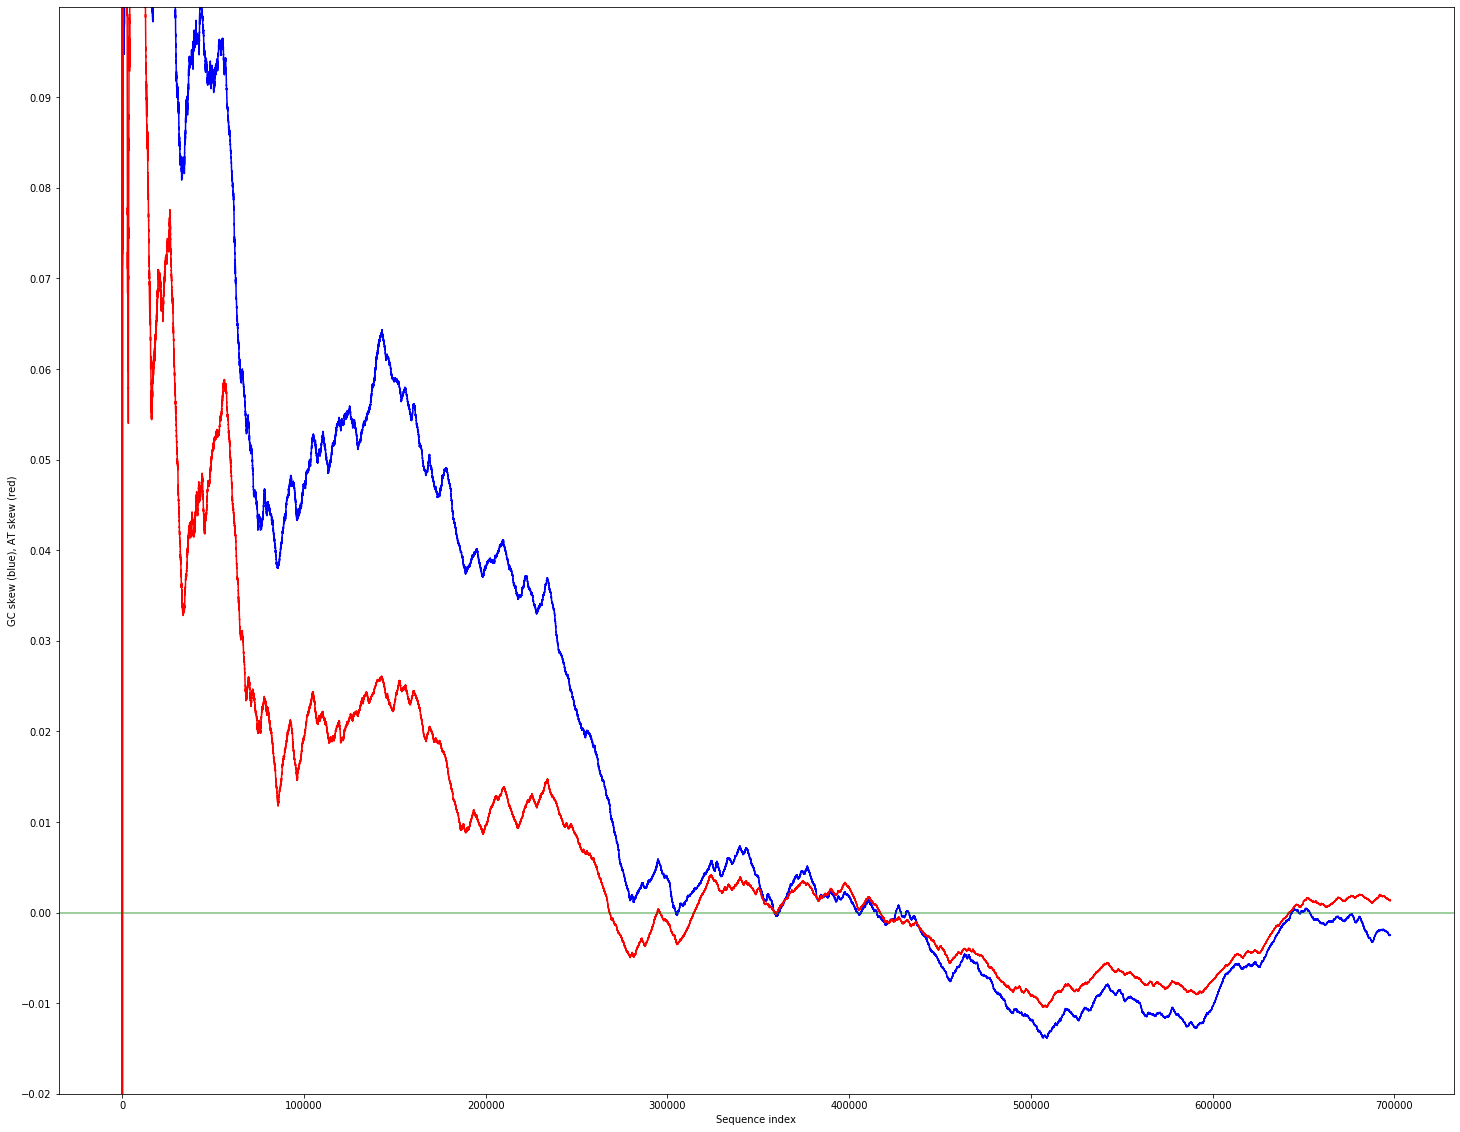

In [66]:
# Plot the GC skew with matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(25,20))
ax = plt.gca()
ax.set_ylim([-0.02,0.1])
ax.yaxis.set_ticks(np.arange(-0.02, 0.1, 0.01))

plt.plot(gc_skew, 'b')
plt.plot(at_skew, 'r')
plt.axhline(y=0, color='g', linestyle='-', alpha=0.5)
plt.ylabel('GC skew (blue), AT skew (red)')
plt.xlabel('Sequence index')
plt.show()

In [77]:
gc_zero_points = []
for (idx, skew) in enumerate(gc_skew):
    if skew == 0:
        if not gc_zero_points:
            gc_zero_points.append((idx, idx))
            continue
        if (idx - gc_zero_points[-1][1]) > 1000:
            gc_zero_points.append((idx, idx))
        else:
            gc_zero_points[-1] = (gc_zero_points[-1][0], idx)

gc_zero_points

[(4, 169),
 (304653, 304686),
 (305762, 305762),
 (358781, 358943),
 (361131, 361173),
 (404613, 404769),
 (406526, 406527),
 (415211, 415282),
 (425626, 425629),
 (428564, 428571),
 (431275, 431315),
 (432674, 432711),
 (643362, 643718),
 (647235, 647434),
 (648439, 648453),
 (653439, 653439)]

In [91]:
counts_offset = dict(counts)
gc_skew_offset = []
at_skew_offset = []
idx = 0

chars = []

with open('sequence.fasta') as fd:
    for line in fd.readlines():
        line = line.strip()
        if not line or line[0] == '>':
            continue
        for char in line:
            counts_offset[char] += 1
            gc_skew_offset.append((counts_offset['G'] - counts_offset['C']) / (counts_offset['G'] + counts_offset['C']))
            at_skew_offset.append((counts_offset['A'] - counts_offset['T']) / (counts_offset['A'] + counts_offset['T']))
            idx += 1

print('Nucleotide counts:', counts_offset)

Nucleotide counts: {'A': 812403, 'G': 234684, 'C': 235839, 'T': 810246}


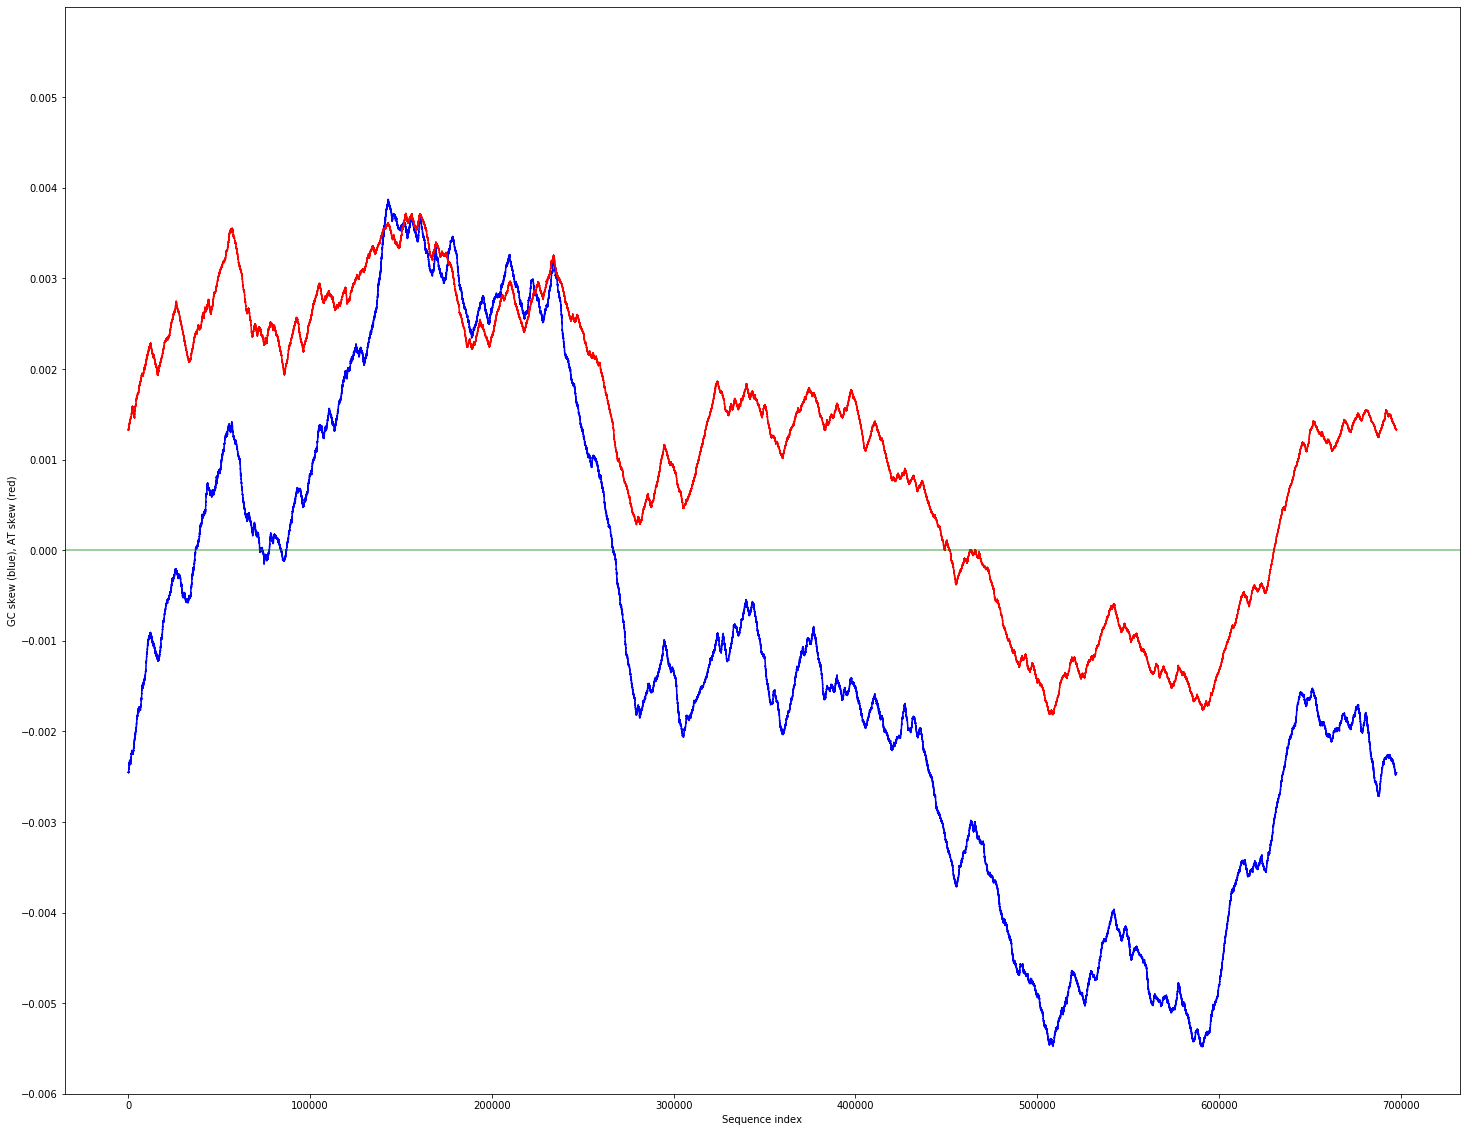

In [95]:
# Plot the GC skew with matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(25,20))
ax = plt.gca()
minim = -0.006
maxim = 0.006
ax.set_ylim([minim,maxim])
ax.yaxis.set_ticks(np.arange(minim, maxim, 0.001))
plt.plot(gc_skew_offset, 'b')
plt.plot(at_skew_offset, 'r')
plt.axhline(y=0, color='g', linestyle='-', alpha=0.5)
plt.ylabel('GC skew (blue), AT skew (red)')
plt.xlabel('Sequence index')
plt.show()

In [96]:
gc_zero_points_offset = []
for (idx, skew) in enumerate(gc_skew_offset):
    if skew == 0:
        if not gc_zero_points_offset:
            gc_zero_points_offset.append((idx, idx))
            continue
        if (idx - gc_zero_points_offset[-1][1]) > 1000:
            gc_zero_points_offset.append((idx, idx))
        else:
            gc_zero_points_offset[-1] = (gc_zero_points_offset[-1][0], idx)

gc_zero_points_offset


[(36958, 36965),
 (72282, 73820),
 (77507, 77578),
 (83963, 84139),
 (86744, 87014),
 (266614, 266722)]